In [262]:
import os
import csv
from email.parser import BytesParser, Parser
from email.policy import default
import numpy as np
import pandas as pd
import sys

In [263]:
def send_email_features_to_csv(emails, csvFileName):
    with open(csvFileName, 'w', newline='') as fp:
        writer = csv.writer(fp)
        
        # header row
        writer.writerow(["To","Body"])
        
        # define max & count
        
        for filename in os.listdir(emails):
            try:
                if (filename.endswith('.txt')):
                    # read each file as binary 
                    with open(os.path.join(emails, filename), 'rb') as fp:

                        # define message object
                        msg = BytesParser(policy=default).parse(fp)
                        to_ = msg.get('to')

                        # parse features
                        
                        body_ = msg.get_body(preferencelist=('plain')).get_content()
                       

                        # Write the row to the csv file
                        writer.writerow([to_,body_])
            except:
                pass

In [264]:
#Get all of the files from the spam and ham directory
hamPath = "data/ham_text/"
spamPath = "data/spam_text/"

In [265]:
send_email_features_to_csv(hamPath, "allHamData.csv")
send_email_features_to_csv(spamPath, "allSpamData.csv")

## HAM DATA SET UP

In [266]:
emailHamData = pd.read_csv('allHamData.csv')

In [267]:
emailHamData.shape # Check the size of the dataset

(1783, 2)

In [268]:
emailHamData.info() # Check to see if there are missing values (NaN or null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   To      1766 non-null   object
 1   Body    1783 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


In [269]:
emailHamData.head()

,To,Body
0,ilug@linux.ie,"On Tue, Aug 13, 2002 at 12:22:14PM +0100, Nial..."
1,fork@spamassassin.taint.org,Lucas Gonze:\n>Spam is *the* tool for dissiden...
2,zzzzteana@yahoogroups.com,\n\nhttp://www.thisislocallondon.co.uk/news/we...
3,zzzzteana@yahoogroups.com,Tom R:\n> http://www.cliktrik.com/people/famil...
4,fork@spamassassin.taint.org,JoeBar wrote:\n>C is more reliable than Java??...


In [270]:
#Remove any all duplicates in emails data
emailHamData = emailHamData.drop_duplicates(subset=['Body'])

In [271]:
emailHamData.shape # Check the size of the dataset

(1286, 2)

In [272]:
emailHamData["Label"] = 0

### Spam Data setup

In [273]:
emailSpamData = pd.read_csv('allSpamData.csv')

In [274]:
emailSpamData.shape # Check the size of the dataset

(89, 2)

In [275]:
emailSpamData.info() # Check to see if there are missing values (NaN or null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   To      88 non-null     object
 1   Body    89 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [276]:
emailSpamData.head()

,To,Body
0,bruce@untroubled.org,\n\n\n\n1 'Trick' Reverses Nerve Pain? -Try To...
1,bruce@untroubled.org,\n\n\nCongratulations - Details Apply\n\nhttp:...
2,bruce@untroubled.org,\n\n\nFLASH SALE! $9.99 for 11x14 Custom Canva...
3,bruce@untroubled.org,"\n\n\n\nHey,\n\nWhat if it only took 35-second..."
4,bruce@untroubled.org,\n\nSpecial Offer!\n\nCongratulations!\nhttp:/...


In [277]:
#Remove any all duplicates in emails data
emailSpamData = emailSpamData.drop_duplicates(subset=['Body'])

In [278]:
emailSpamData["Label"] = 1

In [279]:
emailSpamData.shape # Check the size of the dataset

(86, 3)

In [280]:
from sklearn.utils import shuffle
#hamEmails = shuffle(hamEmails).reset_index()
totalEmailsNeeded = len(emailSpamData)-1

emailHamData = shuffle(emailHamData)
emailHamData = emailHamData.reset_index()
emailHamData = emailHamData.drop(["index"], axis=1)
emailHamData = emailHamData.loc[0:totalEmailsNeeded, :]
emailHamData

emailSpamData = emailSpamData.reset_index()
emailSpamData = emailSpamData.drop(["index"], axis=1)
emailSpamData

,To,Body,Label
0,bruce@untroubled.org,\n\n\n\n1 'Trick' Reverses Nerve Pain? -Try To...,1
1,bruce@untroubled.org,\n\n\nCongratulations - Details Apply\n\nhttp:...,1
2,bruce@untroubled.org,\n\n\nFLASH SALE! $9.99 for 11x14 Custom Canva...,1
3,bruce@untroubled.org,"\n\n\n\nHey,\n\nWhat if it only took 35-second...",1
4,bruce@untroubled.org,\n\nSpecial Offer!\n\nCongratulations!\nhttp:/...,1
...,...,...,...
81,bruce@untroubled.org,"\n\nDear Patriot,\n\nI just got word that we h...",1
82,bruce@untroubled.org,\n\n\nYou wake up...\nhttp://www.translator-di...,1
83,bruce@untroubled.org,\nTime is running out to become a part of the...,1
84,bruce@untroubled.org,"\n\n\nThanks to this Harvard experiment, 5,683...",1


### Combine datasets

In [281]:
allEmails = [emailHamData, emailSpamData]

In [282]:
allEmails = pd.concat([emailHamData,emailSpamData], ignore_index=True)
allEmails.shape

(172, 3)

## Separate the features (x) from the labels (y)

In [283]:
# Separate the features (x) from the labels (y)
x = allEmails['Body']
y = allEmails["Label"]

In [284]:
# Apply a count vectorizer to the training data to convert from text to token counts
# Count vectorizer -- will it ensure the testing data has no impact on the training data's normalization?
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

from sklearn.feature_extraction import text

stList = text.ENGLISH_STOP_WORDS
stList = list(stList)

ourStopWords = ['www', 'com', 'php', 'https', 'xml','org','uk', 'net', 'like', 'html', 'http', 'index',
            'hml', 'htm', 'just', 'know', 'yahoo', 've', 'way', 'linux', 'said', 'day', 'time', 'ca', 'url', 
            'did', 'bruce']

stopWords = ourStopWords + stList
         

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents= "unicode", stop_words=stopWords, max_features=30) # This cuts the features to 40 words
features = cv.fit_transform(x)
features.get_shape()



(172, 30)

In [285]:
columns = cv.get_feature_names_out()

# Features is now in csr format (rather than a series or dataframe)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
type(features)
x = pd.DataFrame(features.toarray()) # convert it to an dataframe instead
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,0.401163,0.337209,0.488372,2.627907,0.505814,1.627907,1.313953,0.308140,0.319767,0.331395,...,0.470930,3.034884,0.523256,0.377907,0.412791,1.872093,2.267442,0.325581,0.313953,0.401163
std,0.946893,1.303261,1.365782,34.388066,6.557436,21.349800,17.232338,1.094026,0.746974,1.048838,...,1.583642,39.648882,1.136597,4.731650,2.554313,24.552270,29.737221,1.592687,0.868711,2.298385
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,10.000000,12.000000,451.000000,86.000000,280.000000,226.000000,12.000000,6.000000,9.000000,...,14.000000,520.000000,5.000000,62.000000,33.000000,322.000000,390.000000,11.000000,8.000000,29.000000


In [286]:
# Checking to make sure that there are no NaN's
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html
x.isna().sum().sum()

# Should print 0

0

In [287]:
x.columns = columns
#x = x.drop(["gt", "lt"], axis=1) # In the dataset we are using, &gt;  and &lt; are less than or greater than signs in html - not words
x.describe()

,10,14,2002,blog,blogs,blogspot,categories,click,don,free,...,people,radio,rest,salon,users,weblog,weblogs,word,work,world
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,0.401163,0.337209,0.488372,2.627907,0.505814,1.627907,1.313953,0.308140,0.319767,0.331395,...,0.470930,3.034884,0.523256,0.377907,0.412791,1.872093,2.267442,0.325581,0.313953,0.401163
std,0.946893,1.303261,1.365782,34.388066,6.557436,21.349800,17.232338,1.094026,0.746974,1.048838,...,1.583642,39.648882,1.136597,4.731650,2.554313,24.552270,29.737221,1.592687,0.868711,2.298385
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,10.000000,12.000000,451.000000,86.000000,280.000000,226.000000,12.000000,6.000000,9.000000,...,14.000000,520.000000,5.000000,62.000000,33.000000,322.000000,390.000000,11.000000,8.000000,29.000000


In [288]:
columns

array(['10', '14', '2002', 'blog', 'blogs', 'blogspot', 'categories',
       'click', 'don', 'free', 'god', 'group', 'ilug', 'information',
       'journal', 'life', 'list', 'log', 'new', 'news', 'people', 'radio',
       'rest', 'salon', 'users', 'weblog', 'weblogs', 'word', 'work',
       'world'], dtype=object)

In [289]:
x.max()

10               6
14              10
2002            12
blog           451
blogs           86
blogspot       280
categories     226
click           12
don              6
free             9
god             29
group            4
ilug             9
information      7
journal         67
life            47
list             6
log             54
new             14
news            84
people          14
radio          520
rest             5
salon           62
users           33
weblog         322
weblogs        390
word            11
work             8
world           29
dtype: int64

In [290]:
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
x = scaler.fit_transform(x)

In [291]:
#Mean Center data
x = x-np.mean(x,axis=0)

In [292]:
zVar = np.dot(x.T,x)
eigenvalues, eigenvectors = np.linalg.eig(zVar)

c:\Users\vanco\anaconda3\envs\tf\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


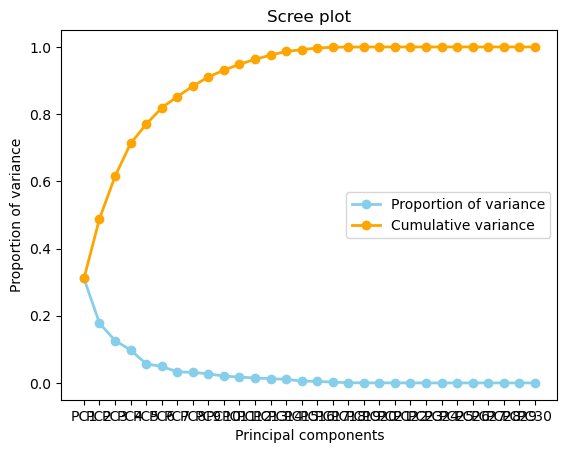

In [293]:
#1. Calculate the proportion of variance explained by each feature
sum_eigenvalues = np.sum(eigenvalues)

prop_var = [i/sum_eigenvalues for i in eigenvalues]

#2. Calculate the cumulative variance
cum_var = [np.sum(prop_var[:i+1]) for i in range(len(prop_var))]


# Plot scree plot from PCA
import matplotlib.pyplot as plt

x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var))]

plt.plot(x_labels, prop_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Cumulative variance")
plt.legend()
plt.title('Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()

In [294]:
display(prop_var)

[(0.3108925006981327+0j),
 (0.1776761372523528+0j),
 (0.12625501441219322+0j),
 (0.09790756244419617+0j),
 (0.056935759061592706+0j),
 (0.049043476371973975+0j),
 (0.03320748737011231+0j),
 (0.031364628900750785+0j),
 (0.02730593804545755+0j),
 (0.02023677328453826+0j),
 (0.0174312744369365+0j),
 (0.014700927708477887+0j),
 (0.01264997671652516+0j),
 (0.010808266758047733+0j),
 (0.005529422901296873+0j),
 (0.004596914309963739+0j),
 (0.0025126644830456746+0j),
 (0.0005191307072747122+0j),
 (0.00016779088227730023+0j),
 (0.0001299202222502216+0j),
 (7.4956400036226e-05+0j),
 (3.1057182616701205e-05+0j),
 (1.7493895345200043e-05+0j),
 (3.296233311586095e-06+0j),
 (1.612040002234572e-06+0j),
 (1.7281291841342445e-08+0j),
 (-3.307429523139181e-17+0j),
 (1.2264876871517398e-18+1.2363773466159595e-18j),
 (1.2264876871517398e-18-1.2363773466159595e-18j),
 (-1.4037887233553218e-19+0j)]

In [295]:
u, s, vh = np.linalg.svd(x, full_matrices=True)
x = pd.DataFrame(x)
x.columns = columns
x

,10,14,2002,blog,blogs,blogspot,categories,click,don,free,...,people,radio,rest,salon,users,weblog,weblogs,word,work,world
0,-0.06686,-0.033721,-0.040698,-0.005827,-0.005882,-0.005814,-0.005814,-0.025678,-0.053295,-0.036822,...,-0.033638,-0.005836,-0.104651,-0.006095,0.017794,-0.005814,-0.005814,-0.029598,-0.039244,-0.013833
1,-0.06686,-0.033721,0.042636,-0.005827,-0.005882,-0.005814,-0.005814,-0.025678,-0.053295,-0.036822,...,-0.033638,-0.005836,-0.104651,-0.006095,-0.012509,-0.005814,-0.005814,-0.029598,0.210756,-0.013833
2,-0.06686,-0.033721,-0.040698,-0.005827,-0.005882,-0.005814,-0.005814,0.057655,0.113372,-0.036822,...,-0.033638,-0.005836,-0.104651,-0.006095,-0.012509,-0.005814,-0.005814,-0.029598,0.085756,-0.013833
3,-0.06686,-0.033721,-0.040698,-0.005827,-0.005882,-0.005814,-0.005814,-0.025678,-0.053295,-0.036822,...,0.037791,-0.005836,-0.104651,-0.006095,-0.012509,-0.005814,-0.005814,-0.029598,-0.039244,-0.013833
4,-0.06686,-0.033721,0.125969,-0.005827,-0.005882,-0.005814,-0.005814,-0.025678,-0.053295,0.074289,...,-0.033638,-0.005836,-0.104651,-0.006095,-0.012509,-0.005814,-0.005814,-0.029598,0.210756,-0.013833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,-0.06686,-0.033721,-0.040698,-0.005827,-0.005882,-0.005814,-0.005814,0.140988,-0.053295,-0.036822,...,0.037791,-0.005836,0.495349,-0.006095,-0.012509,-0.005814,-0.005814,0.061311,0.210756,-0.013833
168,-0.06686,-0.033721,-0.040698,-0.005827,-0.005882,-0.005814,-0.005814,-0.025678,-0.053295,-0.036822,...,-0.033638,-0.005836,0.495349,-0.006095,-0.012509,-0.005814,-0.005814,-0.029598,-0.039244,-0.013833
169,-0.06686,-0.033721,-0.040698,-0.005827,-0.005882,-0.005814,-0.005814,0.057655,0.113372,-0.036822,...,0.109219,-0.005836,0.695349,-0.006095,-0.012509,-0.005814,-0.005814,-0.029598,-0.039244,-0.013833
170,-0.06686,-0.033721,-0.040698,-0.005827,-0.005882,-0.005814,-0.005814,0.057655,-0.053295,-0.036822,...,-0.033638,-0.005836,0.495349,-0.006095,-0.012509,-0.005814,-0.005814,-0.029598,-0.039244,-0.013833


In [296]:
nfeatures = len(x.columns);
nfeatures

30

In [297]:
Vsquare = [[0 for x in range(0,nfeatures)] for y in range(0,nfeatures)] 

for i in range(0,nfeatures):
    for j in range(0,nfeatures):
        Vsquare[i][j] = vh[i][j]**2
        if vh[i][j]<0:

            Vsquare[i][j] = Vsquare[i][j]*-1; 
        else:
            Vsquare[i][j] = Vsquare[i][j]*1; 

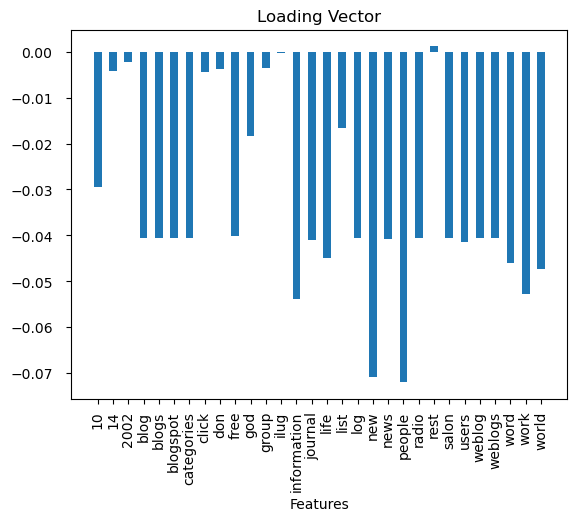

In [298]:
from matplotlib.pyplot import bar, grid, title, xlabel, ylabel

# bar(columns, Vsquare[:][38], 0.5); # CHANGED FROM 1.5 TO 1.0
# grid; 
# xlabel('Feature index')
# ylabel('Importance of feature')
# title("Loading Vector")

y_pos = np.arange(len(columns))
fig, ax = plt.subplots()

ax.bar(columns, Vsquare[:][0], 0.5, linewidth = 1000)
ax.set_xticks(columns)
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.set_xticklabels(columns, rotation=90)
ax.set_xlabel('Features')
ax.set_title('Loading Vector')

plt.show() 

## Split the Data

In [299]:
# Split into training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape

(137, 30)

## Neural Network

In [300]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

train_shape = x_train.shape
b = train_shape[1]
input_shape = (b,)

print(input_shape)

(30,)


#### Sequential Model

In [301]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# https://keras.io/api/models/sequential/

# Activation function options:
# - relu - commonly used for Sequential models
# - sigmoid - good for last layer of binary classification
# - elu - 

model = Sequential()
model.add(Dense(8, input_shape = input_shape, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid')) # Always use a sigmoid function for final layer when performing binary classification.

#### Callbacks

In [302]:
callback1 = keras.callbacks.EarlyStopping(monitor='loss', verbose = 1, min_delta = 0.001,
                                          mode="min", patience=5, restore_best_weights=True) # Works well for loss

callback2 = keras.callbacks.EarlyStopping(
    monitor='precision', verbose = 1, baseline = 0.90,
    min_delta = 0.001, mode="auto", patience=3, restore_best_weights=True) # Works well

In [303]:
model.summary() #This tells us what was in this network
epochs = 500 #Set up the epoch number

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 248       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [304]:
# https://keras.io/api/metrics/classification_metrics/#precision-class
# Optimizer options:
# - sgd (stochastic gradient descent)
# - adam
# - rmsprop
# - adagrad
# - adadelta

# https://keras.io/api/losses/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses 
# Loss parameter options: 
# - binary_crossentropy https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class
# - mse 
# - mae
# - hinge
# - huber

# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics
# metrics can be a list, like this: metrics=["mae", "acc"]
# Metrics parameter options:
# - precision https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision
# - accuracy
# - recall

# https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision
# https://keras.io/api/metrics/classification_metrics/#precision-class

### Hyperparameter Search - Optimize for Precision

In [305]:
# This function will perform a hyperparameter search and print the results to a file
# This takes a while to close the file and flush the buffer!

def hyperparameterSearchWithDoc():
    file = open('output.txt', 'a')
    sys.stdout = file

    optArray = ['sgd', 'adam', 'rmsprop', 'adagrad', 'adadelta']
    lossArray = ['binary_crossentropy', 'mse', 'mae','hinge', 'huber']

    for j in range(0, len(optArray)):
        for k in range(0, len(lossArray)):
            model.compile(optimizer=optArray[j],
                loss=lossArray[k],
                metrics=[keras.metrics.Precision(),
                            keras.metrics.FalseNegatives(),
                            keras.metrics.TrueNegatives(),
                            keras.metrics.FalsePositives(),
                            keras.metrics.TruePositives()
                        ]
                )
       
            print(optArray[j], lossArray[k])
            model.fit(x = x_train, y = y_train, epochs=epochs, callbacks=[callback1, callback2])

            score = model.evaluate(x_test, y_test, verbose=0)
            print("Test loss:", score[0])
            print("Test precision:", score[1])
            print("Test False Negatives:", score[2])
            print("Test True Negatives:", score[3])
            print("Test False Positives:", score[4])
            print("Test True Positives:", score[5])

            file.flush()
            os.fsync(file.fileno())
            file.close()

In [306]:
# This version of the function does not write to a file, 
# but it does output the best combination of optimizers and loss functions.

def hyperparameterSearch():
    
    bestPrecision = 0
    bestOpt = ''
    bestLoss = ''
    bestScore = []

    optArray = ['sgd', 'adam', 'rmsprop', 'adagrad', 'adadelta']
    lossArray = ['binary_crossentropy', 'mse', 'mae','hinge', 'huber']

    for j in range(0, len(optArray)):
        for k in range(0, len(lossArray)):
            model.compile(optimizer=optArray[j],
                loss=lossArray[k],
                metrics=[keras.metrics.Precision(),
                            keras.metrics.FalseNegatives(),
                            keras.metrics.TrueNegatives(),
                            keras.metrics.FalsePositives(),
                            keras.metrics.TruePositives()
                        ]
                )
       
            print(optArray[j], lossArray[k])
            model.fit(x = x_train, y = y_train, epochs=epochs, callbacks=[callback1, callback2])
            
            score = model.evaluate(x_test, y_test, verbose=0)

            if score[1] > bestPrecision:
                bestOpt = optArray[j]
                bestLoss = lossArray[k]
                bestPrecision = score[1]
                bestScore = score
    
    return bestOpt, bestLoss, bestPrecision, bestScore

In [307]:
bestOpt, bestLoss, bestPrecision, bestScore = hyperparameterSearch()

sgd binary_crossentropy
Epoch 1/500
5/5 [==============================] - 1s 2ms/step - loss: 0.6821 - precision_75: 0.5632 - false_negatives_75: 23.0000 - true_negatives_75: 27.0000 - false_positives_75: 38.0000 - true_positives_75: 49.0000
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6816 - precision_75: 0.5870 - false_negatives_75: 18.0000 - true_negatives_75: 27.0000 - false_positives_75: 38.0000 - true_positives_75: 54.0000
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6811 - precision_75: 0.5914 - false_negatives_75: 17.0000 - true_negatives_75: 27.0000 - false_positives_75: 38.0000 - true_positives_75: 55.0000
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6804 - precision_75: 0.5957 - false_negatives_75: 16.0000 - true_negatives_75: 27.0000 - false_positives_75: 38.0000 - true_positives_75: 56.0000
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6799 - precision_75: 0.5957

In [308]:
display(bestOpt, bestLoss, bestPrecision)

'adam'

'mse'

0.9333333373069763

In [309]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test precision:", score[1])
print("Test False Negatives:", score[2])
print("Test True Negatives:", score[3])
print("Test False Positives:", score[4])
print("Test True Positives:", score[5])

Test loss: 0.021190118044614792
Test precision: 0.9333333373069763
Test False Negatives: 0.0
Test True Negatives: 20.0
Test False Positives: 1.0
Test True Positives: 14.0


## Decision Tree

In [311]:
from sklearn import tree


clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [312]:
y_predictionTree = clf.predict(x_test)

In [318]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics


print("Accuracy:", metrics.accuracy_score(y_test, y_predictionTree))
print("Precision:", metrics.precision_score(y_test, y_predictionTree))

Accuracy: 0.8
Precision: 0.8181818181818182


[Text(0.849802371541502, 0.9642857142857143, 'x[16] <= 0.003\ngini = 0.499\nsamples = 137\nvalue = [65, 72]'),
 Text(0.7628458498023716, 0.8928571428571429, 'x[2] <= 0.001\ngini = 0.395\nsamples = 96\nvalue = [26, 70]'),
 Text(0.7312252964426877, 0.8214285714285714, 'x[19] <= -0.001\ngini = 0.278\nsamples = 84\nvalue = [14, 70]'),
 Text(0.6521739130434783, 0.75, 'x[11] <= 0.032\ngini = 0.237\nsamples = 80\nvalue = [11, 69]'),
 Text(0.5889328063241107, 0.6785714285714286, 'x[22] <= -0.005\ngini = 0.18\nsamples = 70\nvalue = [7, 63]'),
 Text(0.5573122529644269, 0.6071428571428571, 'x[8] <= 0.197\ngini = 0.254\nsamples = 47\nvalue = [7, 40]'),
 Text(0.525691699604743, 0.5357142857142857, 'x[8] <= 0.03\ngini = 0.227\nsamples = 46\nvalue = [6, 40]'),
 Text(0.38735177865612647, 0.4642857142857143, 'x[1] <= 0.016\ngini = 0.188\nsamples = 38\nvalue = [4, 34]'),
 Text(0.3557312252964427, 0.39285714285714285, 'x[18] <= -0.005\ngini = 0.219\nsamples = 32\nvalue = [4, 28]'),
 Text(0.23715415019762

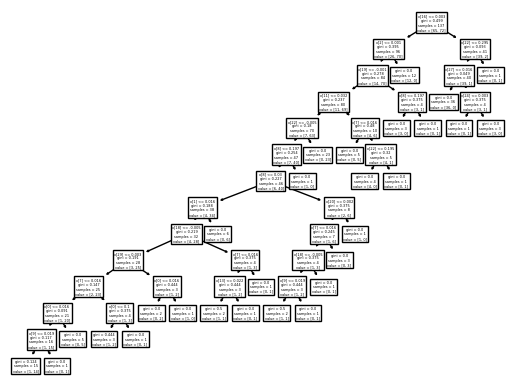

In [319]:
tree.plot_tree(clf)